# Exercise 14

## Integrantes

- Catalina Lago Martinez 201113637
- Jahir Rodriguez Riveros 201819361
- Daniela Sanabria Guerrero 201116798
- Viviana Muñoz 201920081

## Predict rating using LSTM


In [1]:
import pandas as pd

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [6]:
from sklearn.feature_extraction import text
import string
#lista de stopwords y puntuacion
stop = list(text.ENGLISH_STOP_WORDS)
puntuacion=list(string.punctuation)

stop.extend(puntuacion)

letras=list("abcdefghijklmnopqrstuvwxyzñ")
stop.extend(letras)

SYMBOLS = list('{}()[].,:;+-*/&|<>=~$£') 
stop.extend(SYMBOLS)
stop.append('')
stop.append('us$')
stop.append('r&b')
stop.append('\xa0')

In [7]:
plots=plots.to_list()
plots[0]


'most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wande

In [8]:
#Con esto vuelvo minusculas todo
plots=[x.lower() for x in plots]
plots[0]

'most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wande

In [9]:
#Con esto elimino los stop words de cada lista 
X=[]
for i in range(len(plots)):
  X.append(list(filter(lambda x: x not in stop, plots[i].split(' '))))

In [10]:
import itertools
merged = list(itertools.chain(*X))
merged[0]

'story'

In [11]:
merged

['story',
 'single',
 'father',
 'takes',
 'year',
 'old',
 'son',
 'work',
 'railroad',
 'drawbridge',
 'bridge',
 'tender',
 'day',
 'boy',
 'meets',
 'woman',
 'boarding',
 'train',
 'drug',
 'abuser',
 'bridge',
 'father',
 'goes',
 'engine',
 'room',
 'tells',
 'son',
 'stay',
 'edge',
 'nearby',
 'lake',
 'ship',
 'comes',
 'bridge',
 'lifted',
 'supposed',
 'arrive',
 'hour',
 'later',
 'train',
 'happens',
 'arrive',
 'son',
 'sees',
 'tries',
 'warn',
 'father',
 'able',
 'just',
 'oncoming',
 'train',
 'approaches',
 'son',
 'falls',
 'drawbridge',
 'gear',
 'works',
 'attempting',
 'lower',
 'bridge',
 'leaving',
 'father',
 'horrific',
 'choice',
 'father',
 'lowers',
 'bridge',
 'gears',
 'crushing',
 'boy',
 'people',
 'train',
 'completely',
 'oblivious',
 'fact',
 'boy',
 'died',
 'trying',
 'save',
 'drug',
 'addict',
 'woman',
 'happened',
 'look',
 'train',
 'window',
 'movie',
 'ends',
 'man',
 'wandering',
 'new',
 'city',
 'meets',
 'woman',
 'longer',
 'drug',
 '

In [12]:
#Creo el vocabulario de todas las palabras
vocabulary = {x: idx + 1 for idx, x in enumerate(set(merged))}
vocabulary

{'promiscuous': 1,
 'meanings': 2,
 'beckersted': 3,
 'meltzer': 4,
 'czervik': 5,
 'crassus': 6,
 'frankenheimer': 7,
 'quine': 8,
 'entirety': 9,
 'loudspeaker': 10,
 'marianna': 11,
 'catapults': 12,
 'versions': 13,
 'whalers': 14,
 'cosick': 15,
 'worn': 16,
 'millimeter': 17,
 'quintet': 18,
 'putley': 19,
 'abort': 20,
 'accosts': 21,
 'upstanding': 22,
 'pursue': 23,
 'benny': 24,
 'voluntarily': 25,
 'pyncheon': 26,
 'raiders': 27,
 'reopens': 28,
 'owning': 29,
 'cesar': 30,
 'snares': 31,
 'ramifications': 32,
 'utah': 33,
 'indulgence': 34,
 'airports': 35,
 'encounters': 36,
 'locales': 37,
 'cripple': 38,
 'crab': 39,
 'embarked': 40,
 'vibes': 41,
 'successes': 42,
 'alternative': 43,
 'gadgetry': 44,
 'gloucestershire': 45,
 'boyish': 46,
 'bullfighter': 47,
 'alvin': 48,
 'frayn': 49,
 'abstinence': 50,
 'auschwitz': 51,
 'consulate': 52,
 'spetactular': 53,
 'marauder': 54,
 'alberto': 55,
 'pounding': 56,
 'frescia': 57,
 'blackhat': 58,
 'eventually': 59,
 'legalizi

In [13]:
lenght=pd.Series([len(x) for x in X])
lenght.describe(percentiles=[0.8,.9,.95,.97,.975])

count    7895.000000
mean       62.718049
std        40.496204
min         0.000000
50%        55.000000
80%        89.000000
90%       117.000000
95%       140.000000
97%       156.000000
97.5%     161.000000
max       765.000000
dtype: float64

In [14]:
# Max len
max_len_test = 117
X = [x[:max_len_test] for x in X]

In [15]:
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]
X[0]

[26901,
 11680,
 12270,
 24376,
 3907,
 20225,
 21613,
 18739,
 7420,
 16269,
 19736,
 14731,
 1477,
 21965,
 11012,
 31114,
 19756,
 23725,
 2313,
 23479,
 19736,
 12270,
 4949,
 17669,
 5335,
 5493,
 21613,
 16068,
 1914,
 10264,
 36654,
 34781,
 15956,
 19736,
 23728,
 17964,
 24669,
 13231,
 32610,
 23725,
 25297,
 24669,
 21613,
 23719,
 19655,
 8612,
 12270,
 22882,
 11383,
 33081,
 23725,
 31078,
 21613,
 16873,
 16269,
 15700,
 32646,
 26709,
 22995,
 19736,
 25629,
 12270,
 31268,
 22720,
 12270,
 5371,
 19736,
 14180,
 7281,
 21965,
 29801,
 23725,
 18082,
 31230,
 28629,
 21965,
 8321,
 7550,
 34859,
 2313,
 7680,
 31114,
 3757,
 15653,
 23725,
 2248,
 26590,
 30386,
 8180,
 20612,
 12737,
 18095,
 11012,
 31114,
 17237,
 2313,
 7680,
 16423,
 22731,
 11734,
 15193,
 8491,
 1924,
 1236,
 37297,
 2313,
 7680,
 37326,
 28880,
 6229,
 15610]

In [16]:
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(X, maxlen=max_len_test)

Using TensorFlow backend.


In [17]:
X_pad

array([[    0,     0,     0, ..., 28880,  6229, 15610],
       [    0,     0,     0, ..., 11604, 15156, 23643],
       [    0,     0,     0, ...,  3907, 20225,  1108],
       ...,
       [    0,     0,     0, ..., 33612, 24376, 28670],
       [27869, 24947,  7226, ..., 29415, 38045, 24819],
       [    0,     0,     0, ..., 36163, 36560, 16930]], dtype=int32)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [19]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
model = Sequential()
model.add(Embedding(len(vocabulary) +1, 10, input_length=max_len_test))
model.add(LSTM(32, return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 117, 10)           383880    
_________________________________________________________________
lstm_1 (LSTM)                (None, 117, 32)           5504      
_________________________________________________________________
dropout_1 (Dropout)          (None, 117, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 397,737
Trainable params: 397,737
Non-trainable params: 0
________________________________________________

In [20]:
!pip install livelossplot

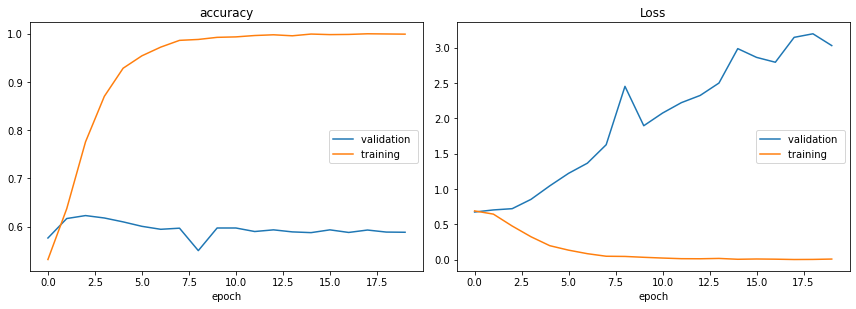

accuracy
	validation       	 (min:    0.551, max:    0.623, cur:    0.589)
	training         	 (min:    0.532, max:    0.999, cur:    0.999)
Loss
	validation       	 (min:    0.674, max:    3.197, cur:    3.030)
	training         	 (min:    0.002, max:    0.690, cur:    0.009)


In [21]:
from livelossplot import PlotLossesKeras
%matplotlib inline
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=20, verbose=1,
          callbacks=[PlotLossesKeras()])

In [22]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.5886415963161934


Con el modelo propuesto se llega a un accuracy del 58%